In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os



In [50]:
auto=pd.read_csv("data/auto_ins.csv",encoding='gbk')
#print(auto.columns)
#print(auto.count())
#print(auto[auto['Loss'].isnull()])
auto['lost_flag']=auto.Loss.map(lambda x:1 if x>0 else 0)

print(auto.head())
print(auto.lost_flag.describe())
print(auto.lost_flag.value_counts()/auto.lost_flag.count())

   EngSize  Age Gender Marital  exp Owner  vAge Garage AntiTFD import  Loss  \
0      2.0   56      男      已婚   20    公司    10      有   有防盗装置     进口   0.0   
1      1.8   41      男      已婚   20    公司     9      有   无防盗装置     国产   0.0   
2      2.0   44      男      未婚   20    公司     8      有   有防盗装置     国产   0.0   
3      1.6   56      男      已婚   20    公司     7      有   有防盗装置     国产   0.0   
4      1.8   45      男      已婚   20    公司     7      无   无防盗装置     国产   0.0   

   lost_flag  
0          0  
1          0  
2          0  
3          0  
4          0  
count    4233.000000
mean        0.284668
std         0.451310
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: lost_flag, dtype: float64
0    0.715332
1    0.284668
Name: lost_flag, dtype: float64


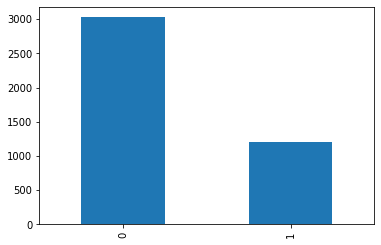

In [47]:
auto.lost_flag.value_counts().plot(kind='bar')
plt.show()

In [52]:
auto_age=auto.groupby(['Age','lost_flag'])[['Loss']].count()

t_auto_age=pd.pivot_table(auto_age,index='Age',columns='lost_flag',values='Loss')
print(t_auto_age.head())

lost_flag     0     1
Age                  
21          5.0   7.0
22          9.0   8.0
23         13.0   5.0
24         31.0  13.0
25         29.0  16.0


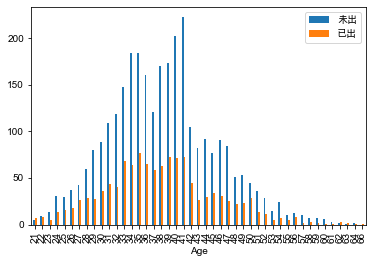

In [62]:
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
plt.rcParams['axes.unicode_minus']=False
t=pd.crosstab(auto.Age,auto.lost_flag)
t.plot(kind="bar")
plt.legend(['未出','已出'])
plt.show()